In [1]:
import requests
import json
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch

In [59]:
url_input = input('Enter URL match')
url_input

'https://www.fotmob.com/es/matches/empoli-vs-inter/2frraf#4535326'

In [60]:
# FotMob

url = url_input

r = requests.get(url)

soup = bs(r.content)

soup.find('script', attrs={'id': '__NEXT_DATA__'})

soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents

soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents[0]

json.loads(soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents[0])

json_fotmob = json.loads(soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents[0])

General info

In [52]:
# ball possesion
local_ball_possesion = json_fotmob['props']['pageProps']['content']['stats']['Periods']['All']['stats'][0]['stats'][0]['stats'][0]
away_ball_possesion = json_fotmob['props']['pageProps']['content']['stats']['Periods']['All']['stats'][0]['stats'][0]['stats'][1]
local_ball_possesion, away_ball_possesion

(35, 65)

In [6]:
# xG
local_xG = json_fotmob['props']['pageProps']['content']['stats']['Periods']['All']['stats'][0]['stats'][1]['stats'][0]
away_xG = json_fotmob['props']['pageProps']['content']['stats']['Periods']['All']['stats'][0]['stats'][1]['stats'][1]
local_xG, away_xG

('5.90', '1.16')

In [7]:
# total shots
local_total_shots = json_fotmob['props']['pageProps']['content']['stats']['Periods']['All']['stats'][0]['stats'][2]['stats'][0]
away_total_shots = json_fotmob['props']['pageProps']['content']['stats']['Periods']['All']['stats'][0]['stats'][2]['stats'][1]
local_total_shots, away_total_shots

(25, 6)

In [8]:
# shots on target
local_shots_target = json_fotmob['props']['pageProps']['content']['stats']['Periods']['All']['stats'][0]['stats'][3]['stats'][0]
away_shots_target = json_fotmob['props']['pageProps']['content']['stats']['Periods']['All']['stats'][0]['stats'][3]['stats'][1]
local_shots_target, away_shots_target

(13, 2)

Shots

In [53]:
df_shots = pd.DataFrame(json_fotmob['props']['pageProps']['content']['shotmap']['shots'])
df_shots.head()

,id,eventType,teamId,playerId,playerName,x,y,min,minAdded,isBlocked,...,period,isOwnGoal,onGoalShot,isSavedOffLine,isFromInsideBox,keeperId,firstName,lastName,fullName,teamColor
0,2766951053,AttemptSaved,8668,958335,Jesper Lindstrøm,81.696602,23.999236,7,NaN,False,...,FirstHalf,False,"{'x': 0.455357142857142, 'y': 0.35502645328042...",False,False,1341475.0,Jesper,Lindstrøm,Jesper Lindstrøm,#0035b8
1,2766956173,AttemptSaved,8668,965764,Iliman Ndiaye,85.708824,33.618750,11,NaN,True,...,FirstHalf,False,"{'x': 0.7175925925925919, 'y': 0.3227513211640...",False,False,NaN,Iliman,Ndiaye,Iliman Ndiaye,#0035b8
2,2766958129,Goal,8668,612150,Dominic Calvert-Lewin,93.700000,38.872619,13,NaN,False,...,FirstHalf,False,"{'x': 0.37466931216931143, 'y': 0.064550264232...",False,True,1341475.0,Dominic,Calvert-Lewin,Dominic Calvert-Lewin,#0035b8
3,2766968337,AttemptSaved,8586,894803,Djed Spence,84.957353,48.344713,22,NaN,True,...,FirstHalf,False,"{'x': 1, 'y': 0.32275132116402117, 'zoomRatio'...",False,False,NaN,Djed,Spence,Djed Spence,#132257
4,2766969741,AttemptSaved,8586,212867,Heung-Min Son,92.100000,31.788750,24,NaN,False,...,FirstHalf,False,"{'x': 0.7579365079365064, 'y': 0.1189083814814...",False,True,303919.0,Heung-Min,Son,Heung-Min Son,#132257


In [54]:
df_shots.shape

(24, 29)

In [55]:
# check if True in isOwnGoal
df_shots[['eventType', 'expectedGoals', 'situation', 'isOwnGoal']]

,eventType,expectedGoals,situation,isOwnGoal
0,AttemptSaved,0.035074,RegularPlay,False
1,AttemptSaved,0.154727,FastBreak,False
2,Goal,0.087428,RegularPlay,False
3,AttemptSaved,0.036235,RegularPlay,False
4,AttemptSaved,0.262259,RegularPlay,False
5,AttemptSaved,0.223398,RegularPlay,False
6,AttemptSaved,0.107536,RegularPlay,False
7,AttemptSaved,0.065769,FastBreak,False
8,Goal,0.356132,RegularPlay,False
9,Miss,0.036904,RegularPlay,False


In [56]:
# check if exists NaN in expectedGoals

has_nan = df_shots['expectedGoals'].isna().any()
print(has_nan)  # Returns True if there are NaN values, False otherwise

# nan_count = df_shots['expectedGoals'].isna().sum()
# print(nan_count)  # Returns the number of NaN values in the column

# no_nan = df_shots['expectedGoals'].notna().all()
# print(no_nan)  # Returns True if no NaN values are present

# df_shots.info()

True


In [57]:
df_shots[['eventType', 'expectedGoals', 'isOwnGoal']]

,eventType,expectedGoals,isOwnGoal
0,AttemptSaved,0.035074,False
1,AttemptSaved,0.154727,False
2,Goal,0.087428,False
3,AttemptSaved,0.036235,False
4,AttemptSaved,0.262259,False
5,AttemptSaved,0.223398,False
6,AttemptSaved,0.107536,False
7,AttemptSaved,0.065769,False
8,Goal,0.356132,False
9,Miss,0.036904,False


In [58]:
# If you want to convert it to a LIST add .tolist()

# xG = df_shots['expectedGoals']
# xG_list = xG.tolist()
# xG_list

# xG=df_shots.expectedGoals
# xG

# xG_loc = df_shots.loc[:, 'expectedGoals']
# xG_loc

xG_get = df_shots.get('expectedGoals')
xG_get

# Using .iloc[]: If you know the position of the name column (e.g., if it's the first column):
# column_position = df_shots.columns.get_loc('expectedGoals')

# column_position
# xG_iloc = df_shots.iloc[:, 15]
# xG_iloc

0     0.035074
1     0.154727
2     0.087428
3     0.036235
4     0.262259
5     0.223398
6     0.107536
7     0.065769
8     0.356132
9     0.036904
10    0.194630
11    0.485041
12         NaN
13    0.021121
14    0.088871
15    0.110914
16    0.087022
17    0.093431
18    0.122768
19    0.107891
20    0.086107
21    0.059914
22    0.241186
23    0.019845
Name: expectedGoals, dtype: float64

In [ ]:
# Replace NaN with 0

# df_shots['expectedGoals'].fillna(0, inplace=True)

# Replace with the mean of the column:
# df_shots['expectedGoals'].fillna(df_shots['expectedGoals'].mean(), inplace=True)

# Replace with the median of the column:
df_shots['expectedGoals'].fillna(df_shots['expectedGoals'].median(), inplace=True)


In [15]:
# get local team id

local_team_id = json_fotmob['props']['pageProps']['general']['homeTeam']['id']
local_team_id

8633

In [16]:
# get general data

json_fotmob['props']['pageProps']['general']

{'matchId': '4506953',
 'matchName': 'Real Madrid-vs-Las Palmas_Sun, Jan 19, 2025, 15:15 UTC',
 'matchRound': '20',
 'teamColors': {'darkMode': {'home': '#ffffff', 'away': '#FFD700'},
  'lightMode': {'home': '#085098', 'away': '#da9f00'},
  'fontDarkMode': {'home': 'rgba(29, 29, 29, 1.0)',
   'away': 'rgba(29, 29, 29, 1.0)'},
  'fontLightMode': {'home': 'rgba(255, 255, 255, 1.0)',
   'away': 'rgba(255, 255, 255, 1.0)'}},
 'leagueId': 87,
 'leagueName': 'LaLiga',
 'leagueRoundName': 'Round 20',
 'parentLeagueId': 87,
 'countryCode': 'ESP',
 'parentLeagueName': 'LaLiga',
 'parentLeagueSeason': '2024/2025',
 'parentLeagueTopScorerLink': 'https://data.fotmob.com/stats/87/season/23686/goals.json',
 'parentLeagueTournamentId': 23686,
 'homeTeam': {'name': 'Real Madrid', 'id': 8633},
 'awayTeam': {'name': 'Las Palmas', 'id': 8306},
 'coverageLevel': 'xG',
 'matchTimeUTC': 'Sun, Jan 19, 2025, 15:15 UTC',
 'matchTimeUTCDate': '2025-01-19T15:15:00.000Z',
 'started': True,
 'finished': True}

In [17]:
# get league name and league round for the viz

leagueName = json_fotmob['props']['pageProps']['general']['leagueName']
print(leagueName)
leagueRound = json_fotmob['props']['pageProps']['general']['leagueRoundName']
print(leagueRound)

LaLiga
Round 20


In [18]:
league_title = leagueName + ' | ' + leagueRound
league_title

'LaLiga | Round 20'

In [19]:
# local team info and away team info

json_fotmob['props']['pageProps']['header']['teams']

[{'name': 'Real Madrid',
  'id': 8633,
  'score': 4,
  'imageUrl': 'https://images.fotmob.com/image_resources/logo/teamlogo/8633_small.png',
  'pageUrl': '/teams/8633/overview/real-madrid',
  'fifaRank': None},
 {'name': 'Las Palmas',
  'id': 8306,
  'score': 1,
  'imageUrl': 'https://images.fotmob.com/image_resources/logo/teamlogo/8306_small.png',
  'pageUrl': '/teams/8306/overview/las-palmas',
  'fifaRank': None}]

In [20]:
# Get ID and team names

local_team_name = json_fotmob['props']['pageProps']['header']['teams'][0]['name']
print(local_team_name)
away_team_name = json_fotmob['props']['pageProps']['header']['teams'][1]['name']
print(away_team_name)

Real Madrid
Las Palmas


In [21]:
# score

local_team_score = json_fotmob['props']['pageProps']['header']['teams'][0]['score']
print(local_team_score)
away_team_score = json_fotmob['props']['pageProps']['header']['teams'][1]['score']
print(away_team_score)

4
1


In [22]:
# title for the viz

plot_title = local_team_name + ' ' + str(local_team_score) + '-' + str(away_team_score) + ' ' + away_team_name
plot_title

'Real Madrid 4-1 Las Palmas'

In [23]:
# Get color teams

json_fotmob['props']['pageProps']['general']['teamColors']

{'darkMode': {'home': '#ffffff', 'away': '#FFD700'},
 'lightMode': {'home': '#085098', 'away': '#da9f00'},
 'fontDarkMode': {'home': 'rgba(29, 29, 29, 1.0)',
  'away': 'rgba(29, 29, 29, 1.0)'},
 'fontLightMode': {'home': 'rgba(255, 255, 255, 1.0)',
  'away': 'rgba(255, 255, 255, 1.0)'}}

In [24]:
# local and away team names for the viz

shots_local_name = local_team_name + ' ' + 'shots'
shots_local_name = shots_local_name.upper()
print(shots_local_name)

shots_away_name = away_team_name + ' ' + 'shots'
shots_away_name = shots_away_name.upper()
print(shots_away_name)

REAL MADRID SHOTS
LAS PALMAS SHOTS


In [25]:
# check type isOwnGoal | looks like a boolean

type('isOwnGoal')

str

In [26]:
df_shots.columns

Index(['id', 'eventType', 'teamId', 'playerId', 'playerName', 'x', 'y', 'min',
       'minAdded', 'isBlocked', 'isOnTarget', 'blockedX', 'blockedY',
       'goalCrossedY', 'goalCrossedZ', 'expectedGoals',
       'expectedGoalsOnTarget', 'shotType', 'situation', 'period', 'isOwnGoal',
       'onGoalShot', 'isSavedOffLine', 'isFromInsideBox', 'keeperId',
       'firstName', 'lastName', 'fullName', 'teamColor'],
      dtype='object')

In [27]:
# keeperId

df_shots[['keeperId', 'eventType']]

,keeperId,eventType
0,170323.0,Goal
1,NaN,Miss
2,NaN,Miss
3,212512.0,AttemptSaved
4,NaN,AttemptSaved
5,212512.0,Goal
6,NaN,Miss
7,NaN,Miss
8,212512.0,AttemptSaved
9,212512.0,AttemptSaved


In [28]:
type('isOwnGoal')

str

In [29]:
# Font -> Fonts are tricky since they have their "brand fonts" so we'll just use something similar
import matplotlib.font_manager as font_manager
font_path = '/home/axel/Code/Python/axel/files/fonts/Arvo/Arvo-Regular.ttf'
# Create a font properties object with the font file
font_props = font_manager.FontProperties(fname=font_path)

In [61]:
home_color = json_fotmob['props']['pageProps']['general']['teamColors']['darkMode']['home']
print(f"Home team color: {home_color}")

away_color = json_fotmob['props']['pageProps']['general']['teamColors']['darkMode']['away']
print(f"Away team color: {away_color}")

Home team color: #1A5DD4
Away team color: #FFFFFF


In [67]:
home_color = json_fotmob['props']['pageProps']['general']['teamColors']['darkMode']['home']
if home_color.lower() == '#ffffff':
    home_color = '#c90076'
print(f"Home team color: {home_color}")

away_color = json_fotmob['props']['pageProps']['general']['teamColors']['darkMode']['away']
if away_color.lower() == '#ffffff':
    away_color = '#c90076'
print(f"Away team color: {away_color}")

Home team color: #1A5DD4
Away team color: #c90076


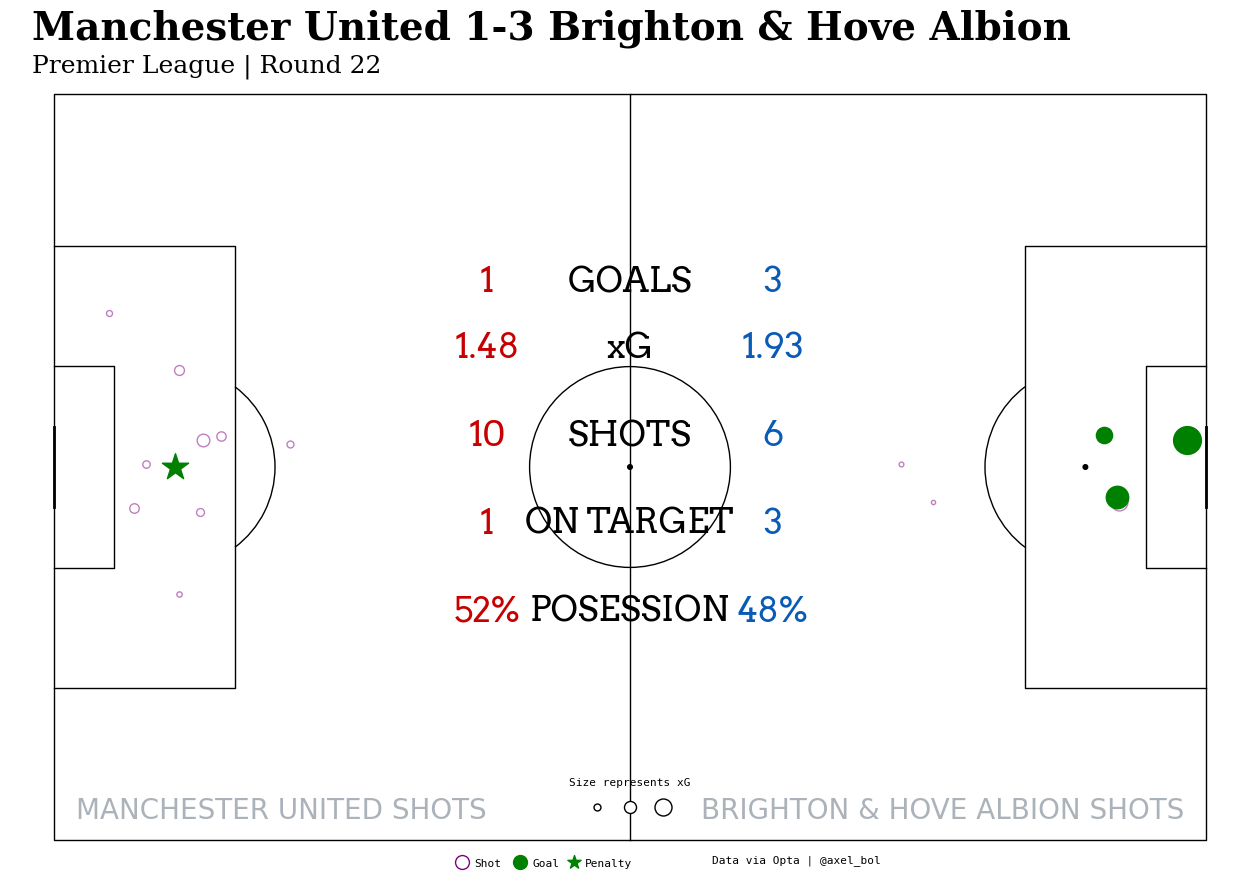

In [30]:
# add facecolor='red' if you want the color red around the pitch
fig, ax = plt.subplots(figsize=(16, 12))
pitch = Pitch(pitch_type='custom', pitch_length=105, pitch_width=68, line_color='black', linewidth=1, pitch_color='white', label=False)
pitch.draw(ax=ax)

# plot the shots
# We want the size of the shot to be 500 * the expected goals value
# We also want to leave the marker empty if the shot was missed and fill it if it was a goal
for x in df_shots.to_dict(orient='records'):
    if x['teamId'] == local_team_id:
        # We want to plot the local team on left side of the pitch
        # So we need to mirror both the x and y coordinates
        c_color = (
            'green' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'False'
            else 'red' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'True'
            else 'white'
        ),
        ec_edge_colors = (
            'green' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'False'
            else 'red' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'True'
            else 'purple'
        ),
        m_marker = (
            '*' if x['situation'] == 'Penalty' and x['eventType'] == 'Goal'
            else 'o'
        )
        pitch.scatter(
            x=105-x['x'],
            y=68-x['y'],
            ax=ax,
            s=500*x['expectedGoals'],
            ec=ec_edge_colors,
            c=c_color,
            marker=m_marker,
            alpha=1 if x['eventType'] == 'Goal' else 0.5,
            zorder=2 if x['eventType'] == 'Goal' else 1
        )
    # right side
    else:
        c_color = (
            'green' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'False'
            else 'red' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'True'
            else 'white'
        ),
        ec_edge_colors = (
            'green' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'False'
            else 'red' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'True'
            else 'purple'
        ),
        m_marker = (
            '*' if x['situation'] == 'Penalty' and x['eventType'] == 'Goal'
            else 'o'
        )
        pitch.scatter(
            x=x['x'],
            y=x['y'],
            ax=ax,
            s=500*x['expectedGoals'],
            ec=ec_edge_colors,
            c=c_color,
            marker=m_marker,
            alpha=1 if x['eventType'] == 'Goal' else 0.5,
            zorder=2 if x['eventType'] == 'Goal' else 1,
        )

# fig.suptitle('The Strongest - Bolivar',  fontsize=15, fontweight=600)
# plt.title('Title', x=0.1, y=1)
# ax.set_title('División Profesional', x=0.1, y=0.95, fontsize=10, fontweight=600, color='black', loc='left')

# We can also add a title directly above the text we added
ax.text(-2, 73, plot_title, ha='left', fontsize=28, fontfamily='serif', fontweight=600, color='black')
ax.text(-2, 70, league_title, ha='left', fontsize=18, fontfamily='serif', fontweight=100)

# We can add a title above the different halves of the pitch
ax.text(2, 2, shots_local_name, ha='left', fontsize=20, fontweight=500, color='#abb2b9')
ax.text(103, 2, shots_away_name, ha='right', fontsize=20, fontweight=500, color='#abb2b9')

# Lets also add a legend for the size of the shots in the bottom middle of the pitch
pitch.scatter(49.5, 3, s=500*.05, ec='black', c='white', ax=ax)
pitch.scatter(52.5, 3, s=500*.15, ec='black', c='white', ax=ax)
pitch.scatter(55.5, 3, s=500*.3, ec='black', c='white', ax=ax)

# We can add a label for the legend
ax.text(52.5, 5, 'Size represents xG', ha='center', fontsize=8, fontfamily='monospace')

# Legend
if 'True' in str(df_shots['isOwnGoal'].values):
    pitch.scatter(29.3, -2, s=500*.2, ec='red', c='red', ax=ax)
    ax.text(33, -2.4, 'Own Goal', ha='center', fontsize=8, fontfamily='monospace')

pitch.scatter(37.2, -2, s=500*.2, ec='purple', c='white', ax=ax)
ax.text(39.5, -2.4, 'Shot', ha='center', fontsize=8, fontfamily='monospace')

pitch.scatter(42.5, -2, s=500*.2, ec='green', c='green', ax=ax)
ax.text(44.8, -2.4, 'Goal', ha='center', fontsize=8, fontfamily='monospace')

if 'Penalty' in df_shots['situation'].values and 'Goal' in df_shots['eventType'].values:
    pitch.scatter(47.4, -2, s=500*.2, ec='green', c='green', marker='*', ax=ax)
    ax.text(50.5, -2.4, 'Penalty', ha='center', fontsize=8, fontfamily='monospace')
# info
ax.text(60, -2, 'Data via Opta | @axel_bol', ha='left', fontsize=8, fontfamily='monospace')

# match context
# pitch.scatter(49.5, 3, s=500*.05, ec='black', c='white', ax=ax)
# pitch.scatter(52.5, 3, s=500*.15, ec='black', c='white', ax=ax)
# pitch.scatter(55.5, 3, s=500*.3, ec='black', c='white', ax=ax)

ax.text(x=52.5, y=50, s='GOALS', ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color='black')
ax.text(x=39.5, y=50, s=local_team_score, ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color=home_color)
ax.text(x=65.5, y=50, s=away_team_score, ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color=away_color)

ax.text(x=52.5, y=44, s='xG', ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color='black')
ax.text(x=39.5, y=44, s=local_xG, ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color=home_color)
ax.text(x=65.5, y=44, s=away_xG, ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color=away_color)

ax.text(x=52.5, y=36, s='SHOTS', ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color='black')
ax.text(x=39.5, y=36, s=local_total_shots, ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color=home_color)
ax.text(x=65.5, y=36, s=away_total_shots, ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color=away_color)

ax.text(x=52.5, y=28, s='ON TARGET', ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color='black')
ax.text(x=39.5, y=28, s=local_shots_target, ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color=home_color)
ax.text(x=65.5, y=28, s=away_shots_target, ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color=away_color)

ax.text(x=52.5, y=20, s='POSESSION', ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color='black')
ax.text(x=39.5, y=20, s=f"{local_ball_possesion}%", ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color=home_color)
ax.text(x=65.5, y=20, s=f"{away_ball_possesion}%", ha='center', fontsize=25, fontproperties=font_props,fontweight=800, color=away_color)

# CHANGE THIS TO YOUR PATH
plt.savefig('/home/axel/Code/images/image.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.35)

plt.show()